# NISAR Sample Data Notebook

> "The project team has created a set of sample products using JAXA ALOS-1 PALSAR data as a surrogate for NISAR. The sample covers the full suite of planned products, from Level 0 raw data (in NISAR format) to Level 1 and Level 2. These data cover a smaller area than a NISAR frame, but the formate and metadata content is fully compatible with the data NISAR will produce after entering the science phase, allowing users to prepare their analysis tools well in advance of operations."
> 
> https://nisar.jpl.nasa.gov/data/overview/

- [NISAR Sample Data Page](https://nisar.jpl.nasa.gov/data/sample-data/)
- [NISAR L1 and L2 ATBD](https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/DOCS/NISAR_D-95677_NASA_L1_L2_ATBD_20231112_R3.4_w-sigs.pdf)


In [1]:
import h5py
import requests
import shutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.crs import CRS
from rasterio.transform import from_origin
import shapely.wkt as wkt
import xarray as xr

## L2 GSLC 

Level 2 Focused SAR image in geocoded coordinates

[GSLC Product Specification](https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/DOCS/NISAR_D-102269_L2_GSLC_Product_Spec_R3.4_2311009_clean_w-sigs.pdf)

**Download Sample GSLC**

In [2]:
gslc_h5 = "NISAR_L2_PR_GSLC_001_005_A_219_2005_DHDH_A_20081127T060959_20081127T061015_P01101_F_N_J_001.h5"
url = f"https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GSLC/ALOS1_Rosamond_20081012/{gslc_h5}"

r = requests.get(url, verify=True, stream=True)
r.raw.decode_content = True
with open(gslc_h5, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

In [3]:
with h5py.File(gslc_h5, 'r') as h5:    
    gslc_path = f'science/LSAR/GSLC/grids/frequencyA'
    gslc = h5[f'{gslc_path}/HH'][:]    
    
    id_path = f'science/LSAR/identification'
    bounding_polygon = h5[f'{id_path}/boundingPolygon'][()].astype(str) 
    poly = wkt.loads(bounding_polygon)
    bbox = [poly.bounds[0], poly.bounds[2], poly.bounds[1], poly.bounds[3]]
    
    xcoor = h5[f'{gslc_path}/xCoordinates'][:]
    ycoor = h5[f'{gslc_path}/yCoordinates'][:]    
    dx = h5[f'{gslc_path}/xCoordinateSpacing'][()].astype(int)
    dy = h5[f'{gslc_path}/yCoordinateSpacing'][()].astype(int)
    transform = from_origin(xcoor[0],ycoor[0],dx,np.abs(dy))
    epsg = h5[f'{gslc_path}/projection'][()].astype(int)

In [4]:
gslc_xr = xr.DataArray(gslc, 
coords={'y': ycoor,'x': xcoor},
dims=["y", "x"])

gslc_xr

<xarray.DataArray (y: 24879, x: 9090)>
array([[nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       ...,
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan+nanj, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj]],
      dtype=complex64)
Coordinates:
  * y        (y) float64 3.914e+06 3.914e+06 3.914e+06 ... 3.789e+06 3.789e+06
  * x        (x) float64 3.655e+05 3.655e+05 3.655e+05 ... 4.564e+05 4.564e+05

In [5]:
gslc[20040][2000]

(0.0003476143-0.00018513203j)

---
## L2 GUNW

Level 2 phase-unwrapped interferogram in geocoded coordinates

[GUNW Product Specification](https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/DOCS/NISAR_D-102272_L2_GUNW_Product_Spec_R3.4_231109_clean_w-sigs.pdf)

**Download Sample GUNW**


In [6]:
gunw_h5 = "NISAR_L2_PR_GUNW_001_005_A_219_220_4020_SH_20081012T060910_20081012T060926_20081127T060959_20081127T061015_P01101_M_F_J_001.h5"
url = f"https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GUNW/ALOS-1_Rosamond_20081012_20081127/{gunw_h5}"

r = requests.get(url, verify=True, stream=True)
r.raw.decode_content = True
with open(gunw_h5, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

**Load the unwrapped interferogram and some metadata**

In [7]:
with h5py.File(gunw_h5, 'r') as h5:    
    unw_path = f'science/LSAR/GUNW/grids/frequencyA/unwrappedInterferogram'
    unw = h5[f'{unw_path}/HH/unwrappedPhase'][:]    
    
    id_path = f'science/LSAR/identification'
    bounding_polygon = h5[f'{id_path}/boundingPolygon'][()].astype(str) 
    poly = wkt.loads(bounding_polygon)
    bbox = [poly.bounds[0], poly.bounds[2], poly.bounds[1], poly.bounds[3]]
    
    xcoor = h5[f'{unw_path}/xCoordinates'][:]
    ycoor = h5[f'{unw_path}/yCoordinates'][:]    
    dx = h5[f'{unw_path}/xCoordinateSpacing'][()].astype(int)
    dy = h5[f'{unw_path}/yCoordinateSpacing'][()].astype(int)
    transform = from_origin(xcoor[0],ycoor[0],dx,np.abs(dy))
    epsg = h5[f'{unw_path}/projection'][()].astype(int)

**Plot unwrapped interferogram**

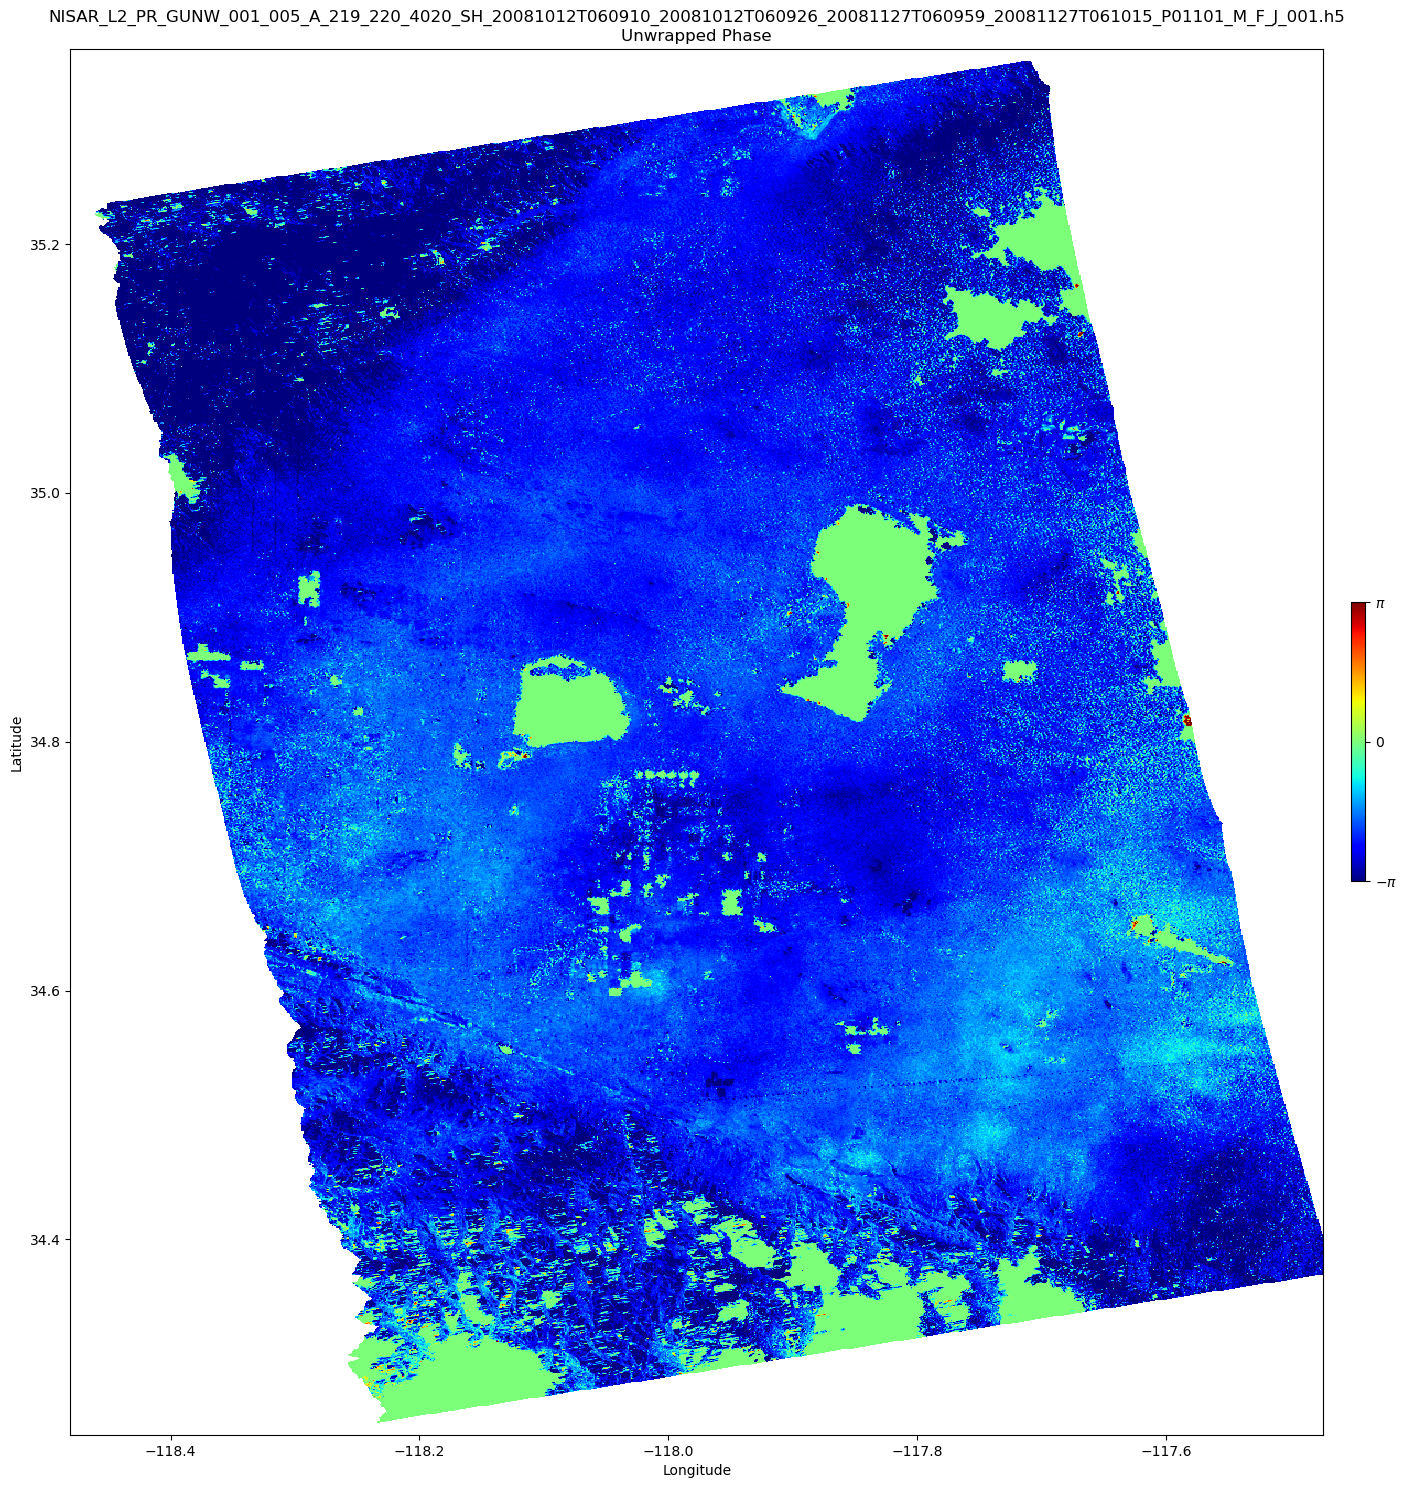

In [8]:
# Convert each pixel to RGB, adjusting colorscale relative to data range
def colorize(array=[], cmap='RdBu', cmin=[], cmax=[]):
    normed_data = (array - cmin) / (cmax - cmin)    
    cm = matplotlib.colormaps[cmap]
    return cm(normed_data) 

fig, ax = plt.subplots(figsize=(18,18))
cax = ax.imshow(colorize(unw, 'jet', -np.pi, np.pi), 
                cmap=plt.cm.jet, interpolation='nearest', 
                origin='upper', extent=bbox, 
                vmin=-np.pi, vmax=np.pi)
cbar = fig.colorbar(cax,orientation='vertical',fraction=0.01,pad=0.02)
cbar.set_ticks([-np.pi, 0., np.pi])
cbar.set_ticklabels([r'$-\pi$', '$0$', r'$\pi$'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'{gunw_h5}\nUnwrapped Phase', fontsize=12)
plt.show()

**Output the unwrapped interferogram as a geotiff**

In [9]:
ds = rasterio.open(f'{gunw_h5.split(".")[0]}_UNW.tif', 'w', driver='GTiff',
                   height = unw.shape[0], 
                   width = unw.shape[1],
                   count=1, 
                   dtype=rasterio.float32,
                   crs=CRS.from_epsg(epsg),
                   transform=transform,
                   nodata=np.nan)
ds.write(unw, 1)
ds.close()

---
## L2 GOFF

### Level 2 pixel offsets in geocoded coordinates

- Contains binary raster layers representing the pixel offset shifts between a pair of coarsely coregistered L1_RSLC granules.
- Primarily meant for cryosphere applications and is only generated for L-SAR acquisitions over Antarctica, Greenland, and selected mountain glaciers. 

[GOFF Product Specification](https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/DOCS/NISAR_D-105010_L2_GOFF_Product_Spec_R3.4_231109_clean_w-sigs.pdf)

**Download sample GOFF**

In [10]:
goff_h5 = "NISAR_L2_PR_GOFF_001_005_A_219_220_4020_SH_20081012T060910_20081012T060926_20081127T060959_20081127T061015_P01101_M_F_J_001.h5"
goff_url = f"https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GOFF/ALOS-1_Rosamond_20081012_20081127/{goff_h5}"

r = requests.get(goff_url, verify=True, stream=True)
r.raw.decode_content = True
with open(goff_h5, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

**Load offsets, retrieve extents, and CRS**

In [11]:
with h5py.File(goff_h5, 'r') as h5:    
    goff_path = f'science/LSAR/GOFF/grids/frequencyA/pixelOffsets/HH'
    goff_products = {
    "Along Track Offsets": h5[f'{goff_path}/layer1/alongTrackOffset'][:],
    "Slant Range Offsets": h5[f'{goff_path}/layer1/slantRangeOffset'][:]
    }

    id_path = f'science/LSAR/identification'
    bounding_polygon = h5[f'{id_path}/boundingPolygon'][()].astype(str) 
    poly = wkt.loads(bounding_polygon)
    bbox = [poly.bounds[0], poly.bounds[2], poly.bounds[1], poly.bounds[3]]
    
    xcoor_layer1 = h5[f'{goff_path}/layer1/xCoordinates'][:]
    ycoor_layer1 = h5[f'{goff_path}/layer1/yCoordinates'][:]    
    dx_layer1 = h5[f'{goff_path}/layer1/xCoordinateSpacing'][()].astype(int)
    dy_layer1 = h5[f'{goff_path}/layer1/yCoordinateSpacing'][()].astype(int)
    transform_layer1 = from_origin(xcoor[0],ycoor[0],dx,np.abs(dy))
    epsg_layer1 = h5[f'{goff_path}/layer1/projection'][()].astype(int)

**Plot the offsets**

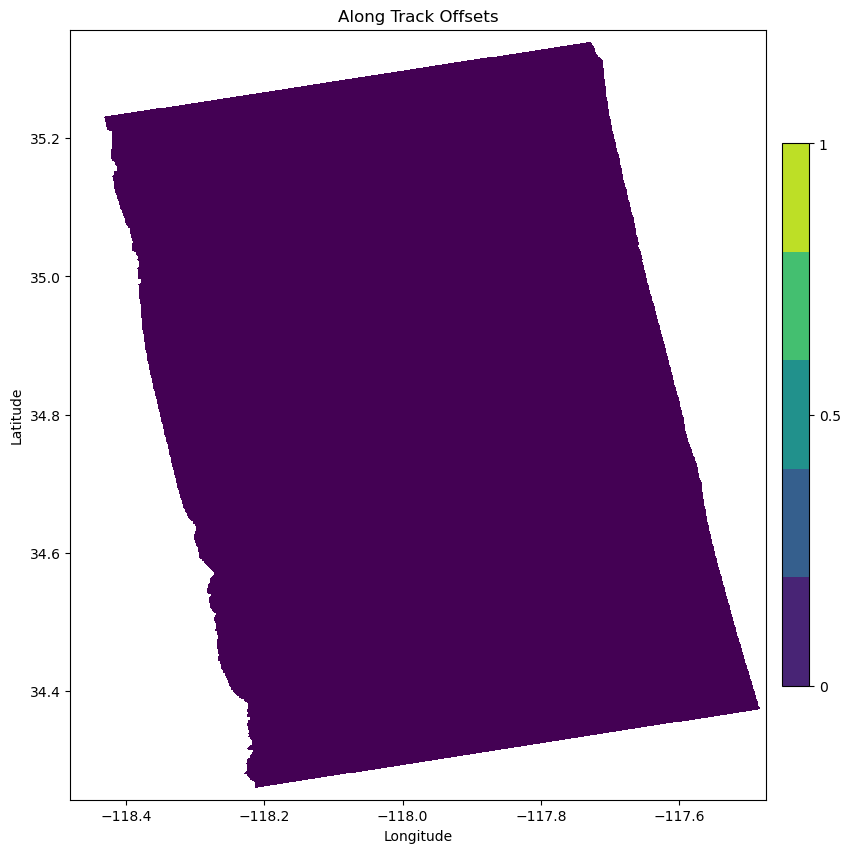

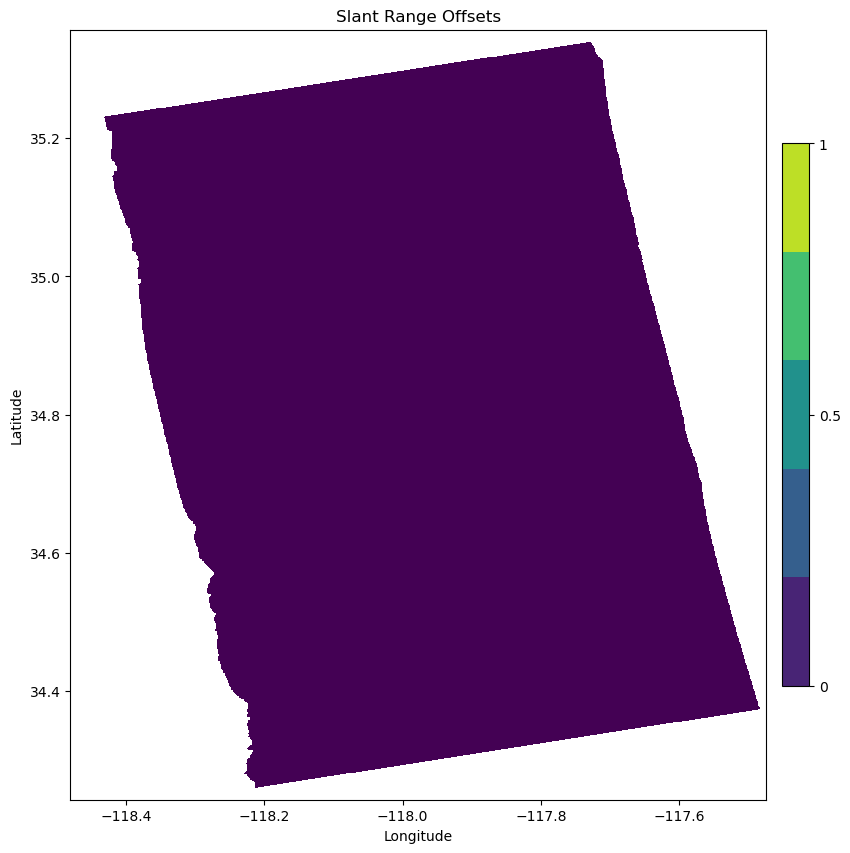

In [12]:
for off in goff_products.keys():

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # define colormap and set nans to display as white
    cmap = plt.cm.viridis
    cmap.set_bad(color='white')
    
    ax_im = ax.imshow(goff_products[off], extent=bbox, vmin=0.0, vmax=1.0, cmap=cmap)
    cbar = fig.colorbar(ax_im, ticks=[0, 0.5, 1], boundaries=np.linspace(0, 1, 6), fraction=0.035, pad=0.02)
    cbar.ax.set_yticklabels(['0', '0.5', '1'])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(off,fontsize=12)

**Output offset rasters to GeoTiff**

In [13]:
for off in goff_products.keys():
    output = f"{goff_h5.split('.')[0]}_{'_'.join(off.split(' '))}.tif"
    ds = rasterio.open(output, 'w', driver='GTiff',
                       height = goff_products[off].shape[0], 
                       width = goff_products[off].shape[1],
                       count=1, 
                       dtype=rasterio.float32,
                       crs=CRS.from_epsg(epsg_layer1),
                       transform=transform_layer1,
                       nodata=np.nan)
    ds.write(goff_products[off], 1)
    ds.close()

---
## L2 GCOV

### Level 2 SAR covariance product in geocoded coordinates

polarimetric covariance matrix is:
- normalized via radiometric terrain correction (RTC)
- geocoded
- multi-looked
  - number varies with topography and radar geometry

[GCOV product specification](https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/DOCS/NISAR_D-102274_L2_GCOV_Product_Spec_R3.4_231109_clean_w-sigs.pdf)

**Download sample GCOV**

In [14]:
gcov_h5 = "NISAR_L2_PR_GCOV_001_005_A_219_4020_SHNA_A_20081012T060910_20081012T060926_P01101_F_N_J_001.h5"
gcov_url = f"https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GCOV/ALOS1_Rosamond_20081012/{gcov_h5}"

r = requests.get(gcov_url, verify=True, stream=True)
r.raw.decode_content = True
with open(gcov_h5, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

**Load covariance raster, retrieve extents and CRS**

In [15]:
with h5py.File(gcov_h5, 'r') as h5:    
    gcov_path = f'science/LSAR/GCOV/grids/frequencyA'
    gcov = h5[f'{gcov_path}/HHHH'][:]  
    
    id_path = f'science/LSAR/identification'
    bounding_polygon = h5[f'{id_path}/boundingPolygon'][()].astype(str) 
    poly = wkt.loads(bounding_polygon)
    bbox = [poly.bounds[0], poly.bounds[2], poly.bounds[1], poly.bounds[3]]
    
    xcoor = h5[f'{gcov_path}/xCoordinates'][:]
    ycoor = h5[f'{gcov_path}/yCoordinates'][:]    
    dx = h5[f'{gcov_path}/xCoordinateSpacing'][()].astype(int)
    dy = h5[f'{gcov_path}/yCoordinateSpacing'][()].astype(int)
    transform = from_origin(xcoor[0], ycoor[0], dx, np.abs(dy))
    epsg = h5[f'{gcov_path}/projection'][()].astype(int)

**Plot the covariance**

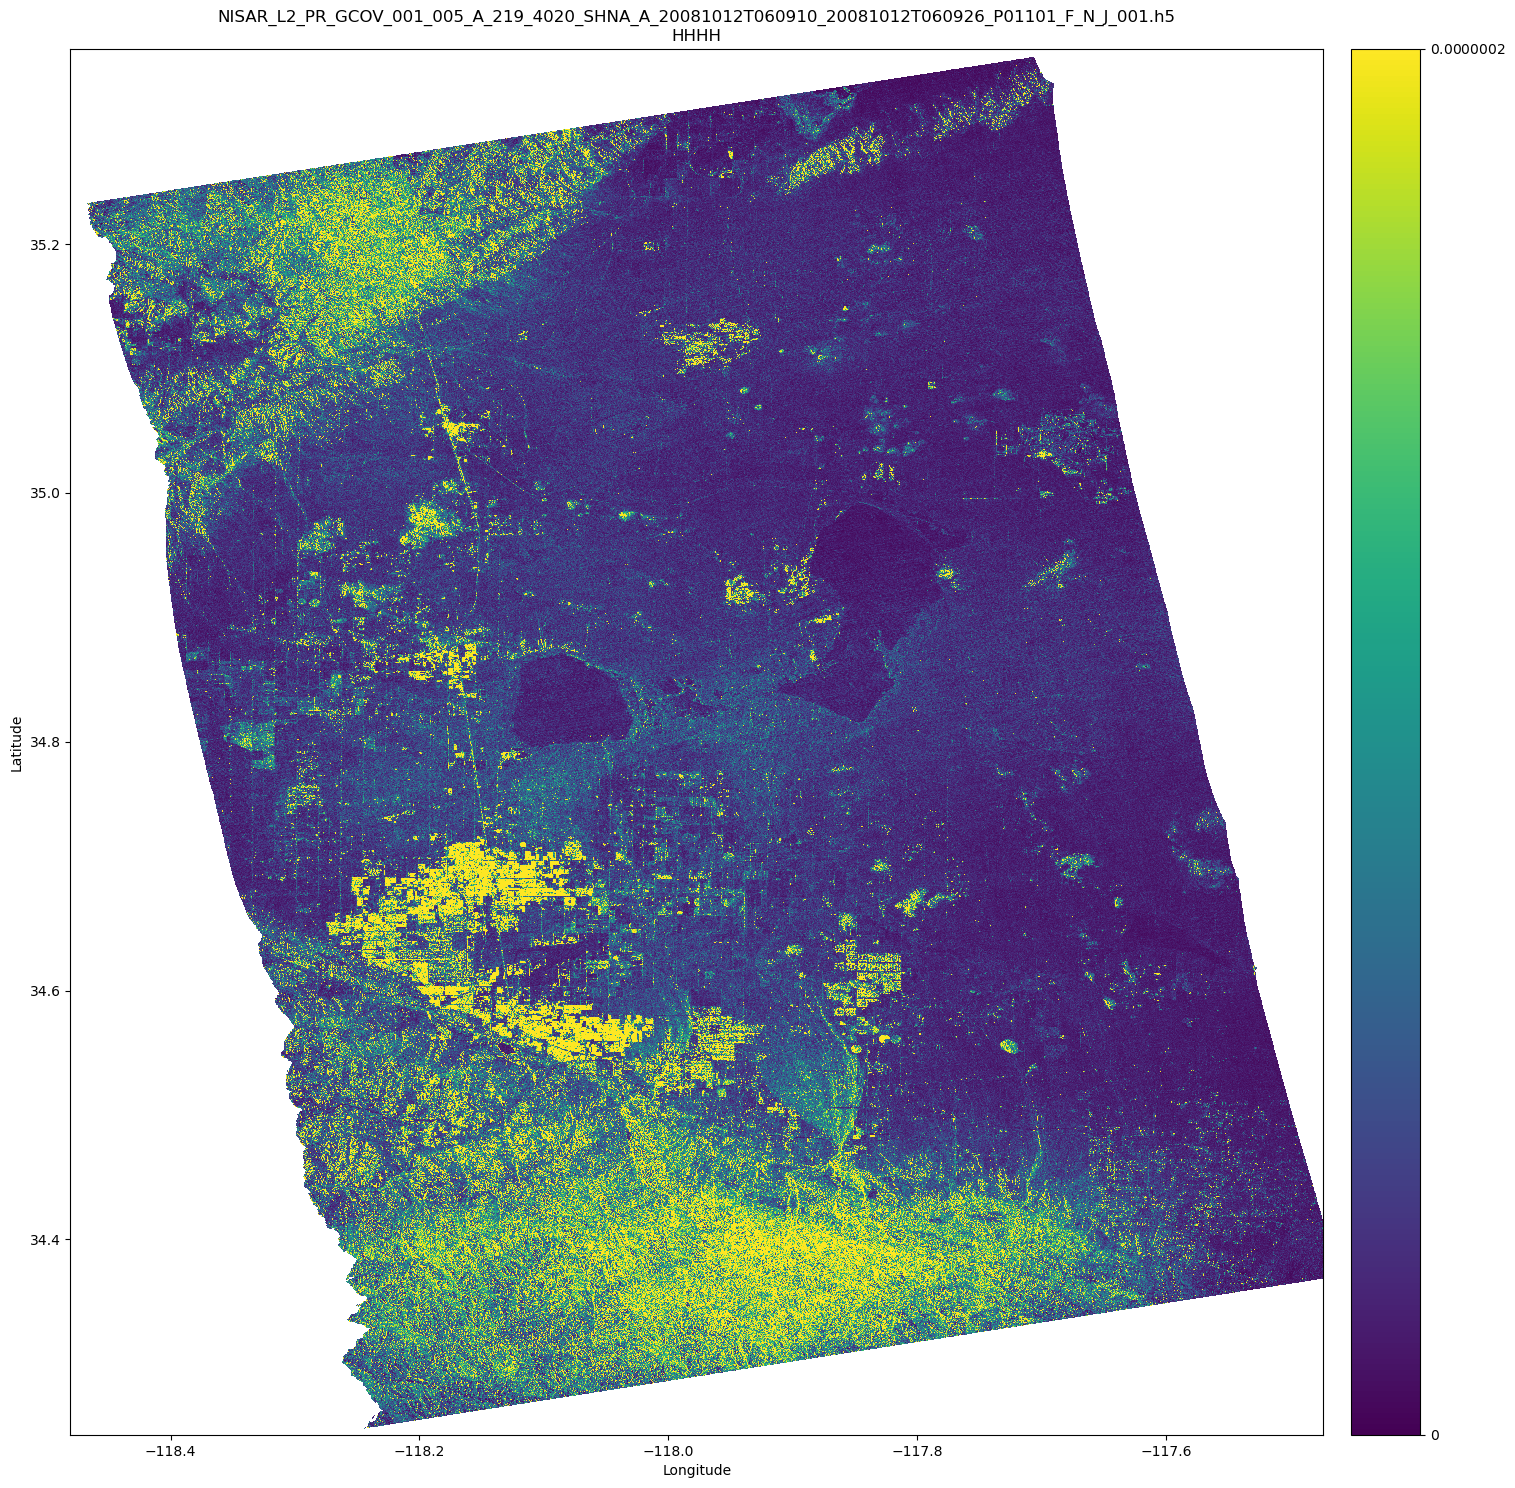

In [16]:
fig, ax = plt.subplots(figsize=(18,18))
cax = ax.imshow(gcov, cmap=plt.cm.viridis,interpolation='nearest', origin='upper',extent=bbox, vmin=0.0, vmax=0.0000002)
cbar = fig.colorbar(cax, orientation='vertical', fraction=0.07, pad=0.02)
cbar.set_ticks([0, 0.0000002])
cbar.set_ticklabels([r'$0$', r'$0.0000002$'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'{gcov_h5}\nHHHH',fontsize=12)
plt.show()

**Output covariance to GeoTiff**

In [18]:
output = f'{gcov_h5.split(".")[0]}_HHHH.tif'
ds = rasterio.open(output, 'w', driver='GTiff',
                   height = gcov.shape[0], 
                   width = gcov.shape[1],
                   count=1, 
                   dtype=rasterio.float32,
                   crs=CRS.from_epsg(epsg),
                   transform=transform,
                   nodata=np.nan)
ds.write(gcov, 1)
ds.close()

---
## L3 SME2

### Level 3 Global Soil Moisture Product

[SM Product Specification](https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/DOCS/NISAR_D-107677_L3_SME2_Product_Spec_R3.4_231204_clean_w-sigs.pdf)

- 200m resolution
- soil moisture algorithms
    - PMI: Physical Model Inversion
    - TSR: Time Series Ratio
    - DSG: Disaggregation

**Download sample SM**

In [19]:
sm_h5 = "NISAR_L3_PR_SME2_001_008_D_070_4000_QPNA_A_20190829T180759_20190829T180809_P01101_M_P_J_001.h5"
sm_url = f"https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/Soil_Moisture/ALOS-2/{sm_h5}"

r = requests.get(sm_url, verify=True, stream=True)
r.raw.decode_content = True
with open(sm_h5, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

**Load soil moisture layers, retrieve extents, and CRS**

In [20]:
with h5py.File(sm_h5, 'r') as h5:    
    algo_path = 'Algorithm'
    pmi_path = f'{algo_path}/PMI/Soil_moisture'
    tsr_path = f'{algo_path}/TSR/Soil_moisture'
    dsg_path = f'{algo_path}/DSG/Soil_moisture'
    
    sm_products = {
    "Physical Model Inversion": h5[pmi_path][:],
    "Time Series Ratio": h5[tsr_path][:],
    "Disaggregation": h5[dsg_path][:]
    }

    id_path = f'identification'
    bounding_polygon = h5[f'{id_path}/boundingPolygon'][()].astype(str) 
    poly = wkt.loads(bounding_polygon[0])
    bbox = [poly.bounds[0], poly.bounds[2], poly.bounds[1], poly.bounds[3]]

**Plot soil moisture data**

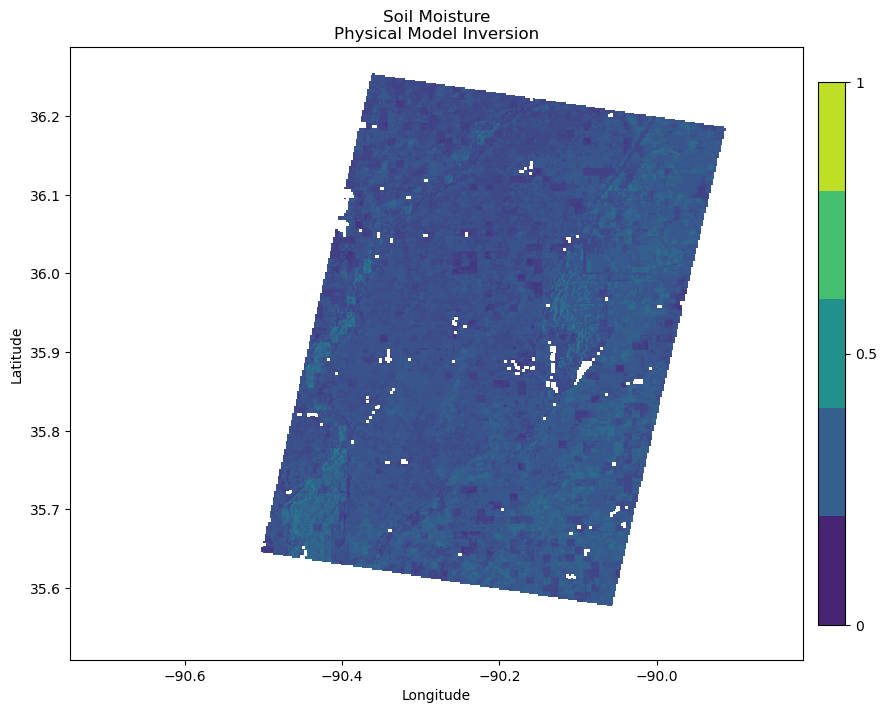

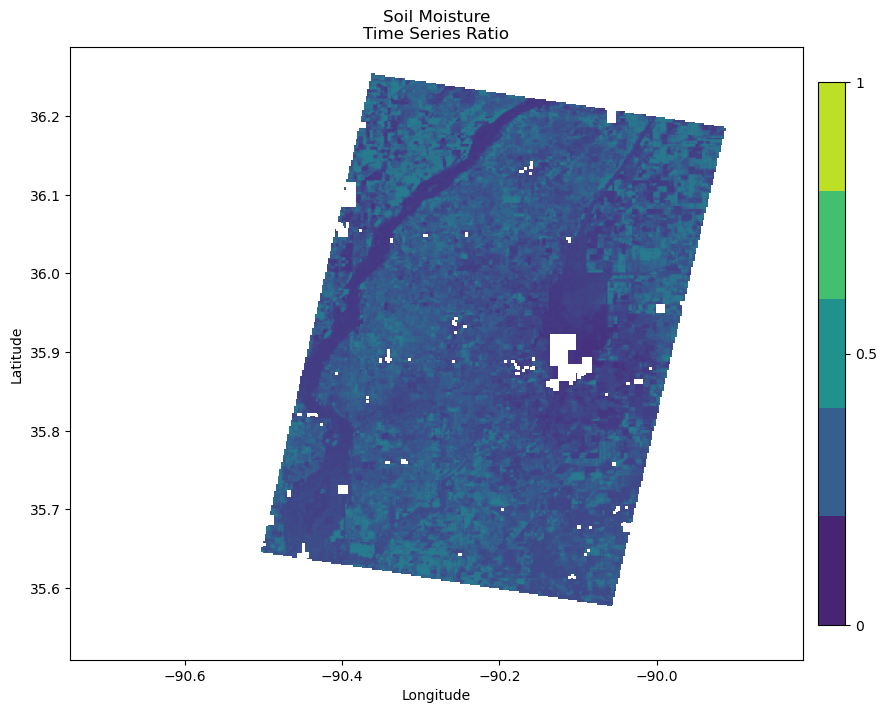

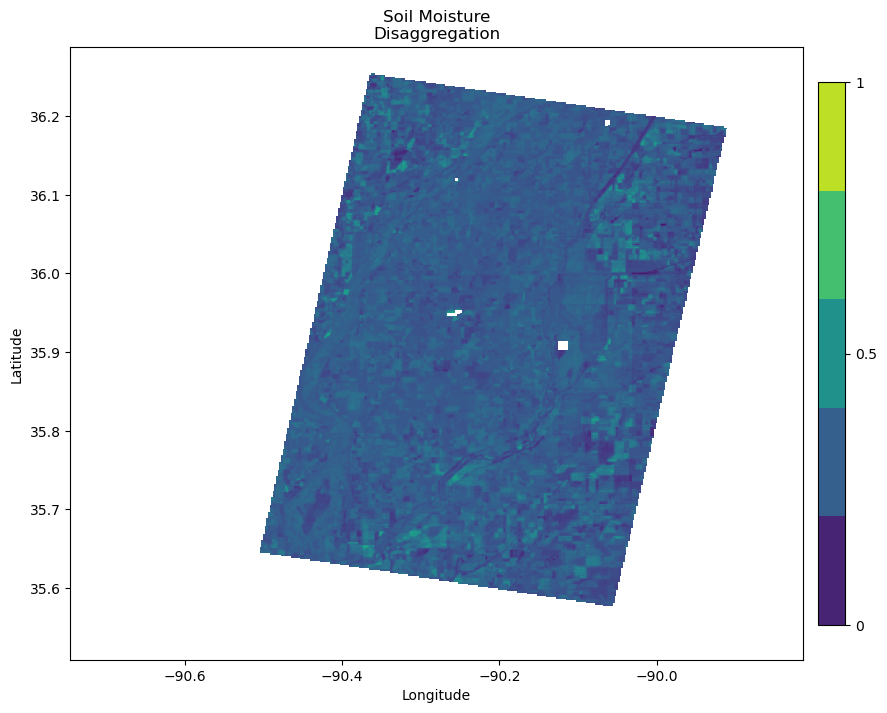

In [21]:
for sm in sm_products.keys():
    # set no-data values to nan
    sm_products[sm][sm_products[sm] == -9999] = np.nan

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # define colormap and set nans to display as white
    cmap = plt.cm.viridis
    cmap.set_bad(color='white')
    
    ax_im = ax.imshow(sm_products[sm], extent=bbox, vmin=0.0, vmax=1.0, cmap=cmap)
    cbar = fig.colorbar(ax_im, ticks=[0, 0.5, 1], boundaries=np.linspace(0, 1, 6), fraction=0.035, pad=0.02)
    cbar.ax.set_yticklabels(['0', '0.5', '1'])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Soil Moisture\n{sm}',fontsize=12)

**Output soil moisture maps to GeoTiff**

*note: not a geocoded product*

In [22]:
%%capture
for sm in sm_products.keys():
    # set no-data values back to -9999 before writing to GeoTiff
    sm_products[sm][sm_products[sm] == np.nan] = -9999
    

    ds = rasterio.open(f'{sm_h5.split(".")[0]}_{"_".join(sm.split(" "))}.tif', 'w', driver='GTiff',
                       height = sm_products[sm].shape[0], 
                       width = sm_products[sm].shape[1],
                       count=1, 
                       dtype=rasterio.float32,
                       nodata=np.nan)
    ds.write(sm_products[sm], 1)
    ds.close()